In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#读入数据
from sklearn.datasets import load_svmlight_file
t_X,t_y=load_svmlight_file("australian_scale.txt")
t_X = t_X.toarray() #转换成numpy数组

#拆分训练集和测试集
from sklearn.model_selection import train_test_split
train_X,test_X, train_y, test_y = train_test_split(t_X,  
                                                   t_y,  
                                                   test_size = 0.2,  
                                                   random_state = 0)

#训练集上的预测值变量
train_y_cal = np.zeros(train_y.shape[0])
#测试集上的预测值变量
test_y_cal = np.zeros(test_y.shape[0])

#线性模型参数初始化，使用正态分布初始化。
W_num = train_X.shape[1]
mu,sigma=0,0.1 #均值与标准差
W=np.random.normal(mu,sigma,W_num)
b=np.random.normal(mu,sigma,1)

In [45]:
#惩罚项
penalty = 10

#迭代更新参数
iteration = 1000
#loss_train
hinge_train = np.zeros(iteration)
#loss_test
hinge_test = np.zeros(iteration)

for iters in range(iteration):
    #计算训练集上的预测值
    for i in range(train_X.shape[0]):
        train_y_cal[i] = np.sum(train_X[i] * W) + np.sum(b)
            
    #计算测试集上的预测值
    for i in range(test_X.shape[0]):
        test_y_cal[i] = np.sum(test_X[i] * W) + np.sum(b)
            
    #计算训练集上的hinge误差
    hinge_train[iters] = 0.5 * np.sum(np.square(W)) + penalty * 1/train_X.shape[0] * np.sum(np.maximum(0, 1 - train_y_cal * train_y))
    
    #计算测试集上的hinge误差
    hinge_test[iters] = 0.5 * np.sum(np.square(W)) + penalty * 1/test_X.shape[0] * np.sum(np.maximum(0, 1 - test_y_cal * test_y))
    
    g_w = np.zeros((train_X.shape[0],train_X.shape[1]))
    #计算梯度以及参数更新位置
    for i in range(train_X.shape[0]):
        if (1 - train_y[i] * train_y_cal[i]) >= 0:
            g_w[i] = -train_y[i] * train_X[i]
    gradient = W + penalty * 1/train_X.shape[0] * np.sum(g_w)
    direction = -gradient
    
    g_b = np.zeros((train_X.shape[0],train_X.shape[1]))
    #计算梯度以及参数更新位置
    for i in range(train_X.shape[0]):
        if (1 - train_y[i] * train_y_cal[i]) >= 0:
            g_b[i] = -train_y[i]
    
    learning_rate = 0.0001
    #参数更新
    W = W + learning_rate * direction
    b = b - learning_rate * penalty * 1/train_X.shape[0] * np.sum(g_b)

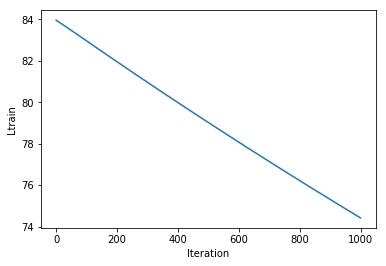

In [46]:
plt.xlabel("Iteration")
plt.ylabel("Ltrain")
plt.plot(hinge_train)

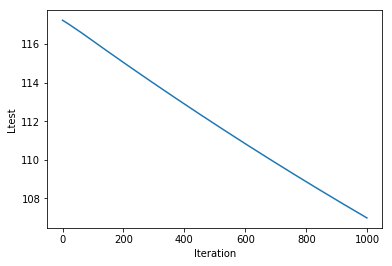

In [47]:
plt.xlabel("Iteration")  
plt.ylabel("Ltest")
plt.plot(hinge_test)